In [ ]:
from datetime import date
#@title # Um breve estudo sobre fatores impactantes no consumo de drogas
#@markdown ---
#@markdown #### Autores
Discente = 'Manuel Ferreira Junior - 20180008601' #@param {type:"string"}
Discente = 'Caroline Assis de Oliveira - 20180011385' #@param {type: "string"}
#@markdown ---
Data = '2021-12-01' #@param {type:"date"}
#@markdown ---

## 1. Introdução


A análise de dados se torna cada vez mais imprenscindivel nos tempos atuais, neste relátório será abordada diferentes formas de se analisar o banco de dados *drug_consumption*, que tem como informações o consumo de drogas lícitas e ilícitas, o sexo do usuário, bem como alguns comportamentos que podem influenciar o consumo, em alguns países. Foram utilizados quatro métodos de *machine learning*, três com tarefas de classificação (regressão logistica, árvore de decisão e floresta aleatória) e um de agrupamento (*KMeans*). Ao longo desse relatório serão abordadas as técnicas utilizadas para aplicação destes métodos.

## 2. Descrição dos Dados

Para deixar nossas análises livre de preconceito, retiramos a variável **ethnicity** que indica a etinia do participante do estudo. 

Após aplicados os métodos de *encoding* que serão descritos em **3.1**, a base tem as seguintes caracteristicas.

* **age** indica a idade do participante no momento do estudo, e tem os seguintes valores
  * 0 para idades entre 18 e 24 anos;
  * 1 para idades entre 25 e 34 anos;
  * 2 para idades entre 35 e 44 anos;
  * 3 para idades entre 45 e 54 anos;
  * 4 para idades entre 55 e 64 anos;
  * 5 para idades maiores que 65 anos.

* **gender** indica o sexo do participante
  * 0 para Masculino;
  * 1 para Feminino.

* **education** indica o nivel educacional do participante
  * 0 para participantes que deixaram a escola antes dos 16 anos;
  * 1 para participantes que deixaram a escola aos 16 anos;
  * 2 para participantes que deixaram a escola aos 17 anos;
  * 3 para participantes que deixaram a escola aos 18 anos;
  * 4 para participantes que ingressaram em alguma faculdade ou universidade, mas não se formaram;
  * 5 para participantes que concluiram o ensino médio ou algum curso profissionalizante;
  * 6 para participantes com Ensino Superior;
  * 7 para participantes com Mestrado;
  * 8 para participantes com Doutorado.

* **country** indica qual o país que o participante vive
  * 0 Estados Unidos;
  * 1 Nova Zelandia;
  * 2 Outro;
  * 3 Austrália;
  * 4 Irlanda;
  * 5 Canadá;
  * 6 Reino Unido.

* **nscore**, **escore**, **oscore**, **ascore**, **cscore**, **impulsive** e **ss** são *scores* para os respectivos comportamentos: neuroticismo, extroversão, abertura à experiência, afabilidade, consciência, impulsividade e busca de sensação.

* **alcohol**, **amphet**, **amyl**, **benzos**, **caff**, **cannabis**, **choc**, **coke**, **crack**, **ecstasy**, **heroin**, **ketamine**, **legalh**, **lsd**, **meth**, **mushrooms**, **nicotine**, **vsa** e **semer** são as variáveis que indicam conforme descrição abaixo o uso das respectivas drogas: álcool, anfetaminas, nitrito de amila, benzodiazepina,  cafeína, cannabis, chocolate, cocaína, crack, ecstasy, heroína, cetamina, drogas legais, LSD, metadona, cogumelos, nicotina, abuso de drogas inaláveis e uma droga fictícia (Semeron), que foi introduzida para identificar aqueles que reivindicam excessivamente.
  * 0 indica que nunca usou;
  * 1 indica que usou a mais de uma década;
  * 2 indica que usou na ultima década;
  * 3 indica que usou no ultimo ano;
  * 4 indica que usou no ultimo mês;
  * 5 indica que usou na ultima semana;
  * 6 indica que usou na ultimo dia.

* Após essa tranformação, as variáveis que indicam as drogas foram binarizadas para criar a variável **used**, que por sua vez indica o uso de drogas ilícitas
  * 0 indica que o participante nunca usou;
  * 1 indica que o participante já usou alguma droga até o momento do estudo.

## 3. Metodologia


### 3.1 Processamento
 


Os resultados na base original estavam normalizados, para serem vistos e analisados com mais clareza foi feita o processo de *label encoding* para retornar aos seus valores originais.

### 3.2 Análise Descritiva e Visualização dos Dados

Como parte das análises descritivas foram feitas uma descritiva geral obtendo a **média**, **mediana** e **quartis** das variáveis, bem como um mapa de calor com as **correlações** das variáveis. Para vermos as diferenças entre os sexos para as variáveis que indicam drogas foi utilizado o teste de Wilcoxon, um teste estatístico não-paramétrico que mede a diferença de dois grupos mutuamente independentes.

### 3.3 Modelagem

#### 3.3.1 Separação dos Dados pelo método ADASYN
A ideia essencial do ADASYN (*adaptive synthetic sampling approach*, em tradução livre abordagem sintética adaptativa de amostragem) é usar uma distribuição ponderada para diferentes exemplos de classes minoritárias de acordo com seu nível de dificuldade de aprendizagem, onde mais dados sintéticos
é gerado para exemplos de classes minoritárias que são mais difíceis de
aprender em comparação com os exemplos minoritários que são mais fáceis de
aprender. Como resultado, a abordagem ADASYN melhora o aprendizado
com relação às distribuições de dados de duas maneiras: (1) reduzindo
o viés introduzido pelo desequilíbrio de classe, e (2) adaptativamente
mudando o limite de decisão de classificação para exemplos difíceis. As análises de simulação em vários dados de aprendizado de máquina conjuntos mostram que esse método tem grande eficácia.

#### 3.3.2 Árvore de Decisão para Classificação
A árvore de decisão é um método que separa a base em grupos e define os aspectos que indicam uma certa caracteristica desta base, para assim poder classificar da melhor maneira os dados.

Existem várias formas de se medir a impureza (critério de decisão do ponto de corte dos níveis da árvore) de diversas formas, neste relatório utilizamos o índice de Gini que é calculado da seguinte forma para o caso binário:

$$Q_m = 2\hat{p}_m(1 - \hat{p}_m)$$

onde $\hat{p}_m$ é a proporção da classe positiva.


#### 3.3.3 Floresta Aleatória
O algoritmo da Floresta Aleatória nada mais é do que um ensemble ou conjunto de Árvores de Decisão, com o intuito de obter melhores métricas para a tarefa de aprendizado supervisionado que for proposta para ela.


#### 3.3.4 Regressão Logística
A Regressão Logística é uma técnica estatistica com o intuito de predizer, dado um conjunto de observações independentes (**X**), uma variável dependente (**Y**) costumeiramente sendo binária. Apartir disso, é possivel predizer a probabilidade de um evento ocorrer, dado um grupo de variáveis independentes.

#### 3.3.5 *KMeans*
O KMeans é um altoritmo de clustering (agrupamento), sendo um método de aprendizagem não supervisionada, agrupando em grupos distintos as observações, de tal forma que entre os grupos sejam Heterogêneos entre os grupos e Homogêneos dentro dos grupos.

In [59]:
#@title
# basics
import os 
import time
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# utils
from scipy.stats import wilcoxon
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# models
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics and selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report,adjusted_rand_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#@title
DIR, FILE = 'data', 'drug.data'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
url_data = os.path.join(DIR,FILE)
r = requests.get(url, allow_redirects=True)
if not os.path.exists(DIR):
  os.makedirs(DIR)
open(url_data, 'wb').write(r.content)

346695

In [4]:
#@title
data = pd.read_csv(url_data, header=None)
data.columns = ['id', 'age', 'gender', 'education', 'country', 'ethnicity',
                'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulssive',
                'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis',
                'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh',
                'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
data.set_index('id', drop=True, inplace=True)
data.drop(["ethnicity"],axis=1, inplace = True)
data.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,ss,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
#@title
data.shape

(1885, 30)

## 4. Resultados

### 4.1 Processamento

Aplicando o método de *label encoder* para reverter a normalização dos dados.

In [78]:
c = data.columns
for i in c:
  LE = LabelEncoder()
  data[i] = LE.fit_transform(data[i]) # transformando as strings em valores numerico
data.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,ss,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,used
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,1,5,6,27,19,16,17,24,3,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,8,6,17,35,29,28,23,2,5,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1
3,2,0,5,6,19,28,14,12,16,1,7,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,1,7,6,22,17,20,27,28,1,2,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1
5,2,1,8,6,31,11,17,21,32,3,5,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1


Binarizando as colunas referentes à drogas (lícitas e ilícitas)

In [79]:
for drug in data.columns[11:]:
  data[drug][data[drug] > 0] = 1
data.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,ss,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,used
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,1,5,6,27,19,16,17,24,3,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,8,6,17,35,29,28,23,2,5,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1
3,2,0,5,6,19,28,14,12,16,1,7,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,1,7,6,22,17,20,27,28,1,2,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1
5,2,1,8,6,31,11,17,21,32,3,5,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1


Criando a coluna **used**

In [80]:
a = data[data.columns[11:]].drop(['caff','choc','alcohol','nicotine'],axis=1)
a_new = a.sum(axis=1)
a_new[a_new>0] = 1
data['used'] = a_new

In [81]:
data.used.value_counts()/data.shape[0]

1    0.841379
0    0.158621
Name: used, dtype: float64

Pode-se notar que a proporção de usuários é muito maior que a de não usuários neste estudo (cerca de 84% dos participantes), mais a frente na **seção 4.3.1** será apresentado uma solução para balancear as proporções.

### 4.2 Análise Descritiva e Vizualização dos Dados

Descritivas básicas contendo mínimo, máximo, média, mediana e quartis.

In [13]:
data.describe()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,ss,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,used
count,1885.000000,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,1.345889,0.499735,4.98992,3.810080,23.921485,22.575597,19.766578,22.875332,23.437135,3.800531,5.560743,0.981963,0.482228,0.307692,0.469496,0.985676,0.780902,0.983024,0.449337,0.136870,0.458355,0.148541,0.209549,0.419629,0.432891,0.241910,0.479045,0.772944,0.004244,0.228117,0.841379
std,1.277454,0.500133,1.76556,2.694455,9.135869,6.763776,6.566712,6.402697,6.963501,2.121445,2.696453,0.133121,0.499817,0.461661,0.499201,0.118853,0.413745,0.129216,0.497559,0.343801,0.498395,0.355730,0.407095,0.493629,0.495607,0.428354,0.499693,0.419040,0.065025,0.419730,0.365419
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.00000,0.000000,17.000000,18.000000,15.000000,19.000000,19.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,5.00000,6.000000,24.000000,23.000000,20.000000,23.000000,24.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,6.00000,6.000000,30.000000,27.000000,25.000000,28.000000,28.000000,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,5.000000,1.000000,8.00000,6.000000,48.000000,41.000000,34.000000,40.000000,40.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mapa de calor para as correlações das variáveis, onde as cores mais claras indicam alta correlação entre as variáveis.

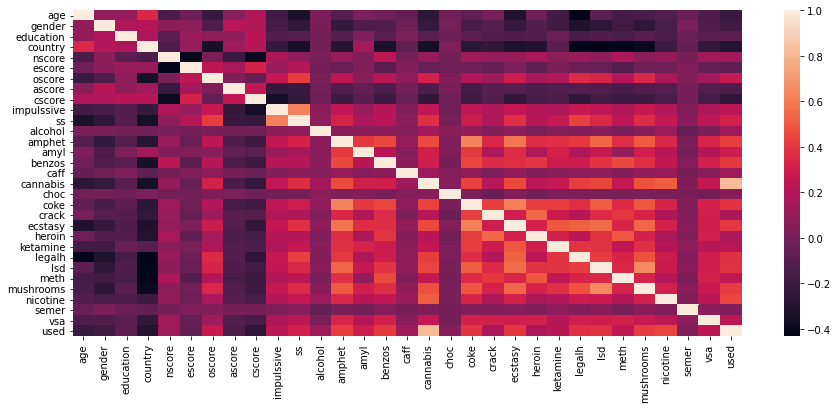

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr())
plt.savefig('heatmap.png')
#plt.show()

Pelo mapa de calor é perceptível que grande parte das drogas são correlacionadas entre si, podendo indicar que a utilização de uma droga pode levar ao consumo de outras drogas.

A seguir, podemos ver a distribuição da variável **used**.

In [15]:
y_name = 'used'
data[y_name].value_counts()
# 0: não usuario de entorpecente ilicito
# 1: usuario de entorpecente ilicito

1    1586
0     299
Name: used, dtype: int64

Retirando as drogas lícitas, iremos elencar as 5 drogas ilícitas com maior quantidade de participantes usuários.

In [16]:
data_drugs = data[data.columns[11:]]
data_drugs[y_name] = data[y_name]
data_drugs.drop(['caff','choc','alcohol','nicotine'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
t = pd.DataFrame(data_drugs.sum().sort_values(ascending=False)[1:6]/data_drugs.shape[0])*100
t.columns = ['%']
t = round(t,2)
t

,%
cannabis,78.09
amphet,48.22
mushrooms,47.90
benzos,46.95
ecstasy,45.84


In [18]:
print(t.to_latex())

\begin{tabular}{lr}
\toprule
{} &      \% \\
\midrule
cannabis  &  78.09 \\
amphet    &  48.22 \\
mushrooms &  47.90 \\
benzos    &  46.95 \\
ecstasy   &  45.84 \\
\bottomrule
\end{tabular}



In [19]:
hall_names_head = data_drugs.sum().sort_values(ascending=False)[1:6]
hall_names_head.index

Index(['cannabis', 'amphet', 'mushrooms', 'benzos', 'ecstasy'], dtype='object')

As drogas com maior consumo entre os participantes são cannabis, amfetaminas, cogumelos, benzodiazepina e ecstasy.

In [20]:
#@title
data_str = data.copy()
for  c in data.iloc[:,11:].columns:
    data_str[c][data_str[c] > 0] = 1

In [21]:
#@title
data_str.drop(['alcohol','caff','choc','nicotine'],axis=1,inplace=True)
data_str.columns

Index(['age', 'gender', 'education', 'country', 'nscore', 'escore', 'oscore',
       'ascore', 'cscore', 'impulssive', 'ss', 'amphet', 'amyl', 'benzos',
       'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh',
       'lsd', 'meth', 'mushrooms', 'semer', 'vsa', 'used'],
      dtype='object')

Foi feita uma breve análise de consumo entre os sexos e graus de escolaridade dentro das 5 drogas mais utilizadas entre os participantes.

In [22]:
df = data_str.groupby(['gender', 'education']).sum().iloc[:,9:]
df[hall_names_head.index]

cannabis  amphet  mushrooms  benzos  ecstasy
gender education                                              
0      0                13       9         10      10        8
       1                46      36         25      27       27
       2                16      13         14       9       11
       3                60      42         40      34       46
       4               325     216        241     195      232
       5               110      70         70      66       63
       6               149     110        107      95       89
       7                84      49         46      46       43
       8                23      17         16      21       17
1      0                 9       9          5       9        7
       1                19      12          7      17        9
       2                 9       7          6       7        7
       3                26      11         13      14       11
       4               148      79         85      91       89
       5                78      46         40      56       37
       6               198     109        107     105      106
       7               118      50         52      59       43
       8                41      24         19      24       19

<Figure size 864x576 with 0 Axes>

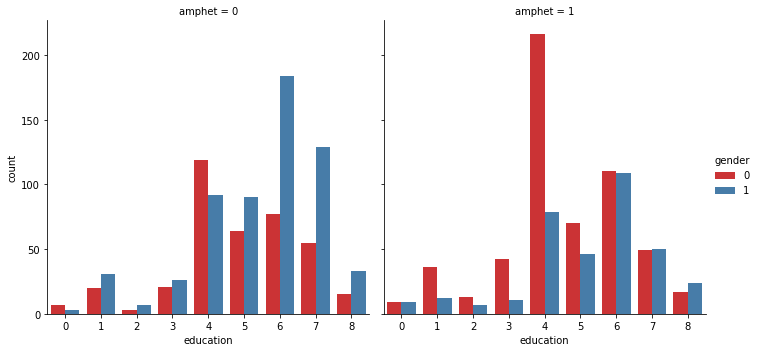

In [23]:
plt.figure(figsize=(12,8))
#sns.barplot(data=data_str, x='education', y='heroin', palette='Set3')
sns.catplot(data=data_str,kind="count",
            x='education',hue='gender',
            col = 'amphet',#'cannabis',#'meth',#'lsd',#'legalh', #vsa, nicotine
            palette='Set1')
plt.savefig('sex_distribution_amphet')
plt.show()

<Figure size 864x576 with 0 Axes>

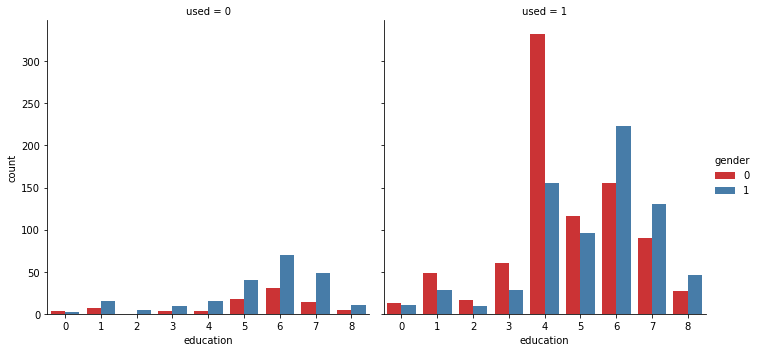

In [24]:
plt.figure(figsize=(12,8))
#sns.barplot(data=data_str, x='education', y='heroin', palette='Set3')
sns.catplot(data=data_str,kind="count",
            x='education',hue='gender',
            col = 'used',#'cannabis',#'meth',#'lsd',#'legalh', #vsa, nicotine
            palette='Set1')
plt.savefig('sex_distribution_used')
plt.show()

É possível ver que, de forma geral, para níveis educacionais mais baixos existem mais usuários homens para as drogas, quando chegamos aos níveis mais altos (graduação, mestrado e doutorado) existem mais usuárias do sexo feminino.

Aplicando o teste de Wilcoxon entre os sexos, é possível medir se há ou não diferença significativa entre o consumo das diferentes drogas ilícitas.

In [25]:
gp0 = data_str[data_str.gender == 0].groupby(['education'],axis=0).sum().iloc[:,10:]
gp1 = data_str[data_str.gender == 1].groupby(['education'],axis=0).sum().iloc[:,10:]

gp0 - gp1

,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,semer,vsa,used
education,,,,,,,,,,,,,,,,
0,0,2,1,4,0,-1,1,-2,2,0,2,1,5,0,1,3
1,24,13,10,27,22,3,18,8,10,19,21,8,18,-1,8,21
2,6,5,2,7,7,3,4,3,1,2,10,0,8,-1,3,7
3,31,14,20,34,19,14,35,11,22,35,28,19,27,1,18,32
4,137,64,104,177,112,49,143,50,76,189,144,93,156,1,75,176
5,24,29,10,32,20,3,26,11,22,36,29,11,30,0,8,20
6,1,1,-10,-49,-12,8,-17,7,9,15,6,15,0,-2,3,-67
7,-1,-6,-13,-34,-11,-5,0,-5,-2,3,-4,-6,-6,0,-4,-41
8,-7,0,-3,-18,-2,2,-2,3,3,0,4,9,-3,0,-4,-19


In [26]:
pvalues = {}
for name in gp0.columns:
    pvalues[name] = round(wilcoxon(gp0[name] - gp1[name])[1], 4)
    
df_pvalues = pd.DataFrame(pvalues.values(), index=pvalues.keys(), columns=['p-value'])
df_pvalues.sort_values('p-value',ascending=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,p-value
ketamine,0.0176
lsd,0.0177
legalh,0.0180
meth,0.0251
heroin,0.0378
amyl,0.0499
mushrooms,0.0499
crack,0.0654
amphet,0.0793
ecstasy,0.0929


In [27]:
print(df_pvalues.to_latex())

\begin{tabular}{lr}
\toprule
{} &  p-value \\
\midrule
amphet    &   0.0793 \\
amyl      &   0.0499 \\
benzos    &   0.3726 \\
cannabis  &   0.5533 \\
coke      &   0.1614 \\
crack     &   0.0654 \\
ecstasy   &   0.0929 \\
heroin    &   0.0378 \\
ketamine  &   0.0176 \\
legalh    &   0.0180 \\
lsd       &   0.0177 \\
meth      &   0.0251 \\
mushrooms &   0.0499 \\
semer     &   0.4795 \\
vsa       &   0.1088 \\
used      &   0.5940 \\
\bottomrule
\end{tabular}



Adotando um nível de significância de 5% ($\alpha$ = 0,05), podemos notar que só não há diferença (não rejeitamos H<sub>0</sub>)no consumo das drogas ketamina, lsd, drogas legalisadas, heroína, nitrito de amila e cogumelos. Para as outras drogas e também o indicador de usuário de drogas ilícitas, o consumo entre os gêneros é estatísticamente iguais.

### 4.3 Modelagem

#### 4.3.1 Separação dos Dados pelo método ADASYN

Nesta seção aplicamos o método ADASYN na variável resposta (**used**) para balancear as proporções, e também é feita a separação das bases de treino e teste para os modelos que serão feitos a seguir.

In [82]:
y_name = 'used'
cols = list(a.columns) + [y_name]

In [83]:
X = data.drop(cols,axis=1)
Y = pd.DataFrame(data[y_name])

In [84]:
Y.value_counts()

used
1       1586
0        299
dtype: int64

In [85]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, Y)

In [86]:
y_resampled.value_counts()

used
1       1586
0       1560
dtype: int64

In [87]:
l = pd.DataFrame(Y.value_counts())
l.columns = ['Sem ADASYN']
l['Com ADASYN'] = y_resampled.value_counts()
l

,Sem ADASYN,Com ADASYN
used,,
1,1586,1586
0,299,1560


In [88]:
print(l.to_latex())

\begin{tabular}{lrr}
\toprule
  &  Sem ADASYN &  Com ADASYN \\
used &             &             \\
\midrule
1 &        1586 &        1586 \\
0 &         299 &        1560 \\
\bottomrule
\end{tabular}



Como é possível observar, nossa variável resposta tem proporções de ocorrência bem mais próximas.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

A base foi separa da em 20% de teste e 80% de treino, essa separação será utilizada em todos os modelos feitos aqui.

#### 4.3.2 Árvore de Decisão

In [120]:
param_grid_dtc = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [100,200,300,400,500,600],
    'min_samples_leaf': [5,50,100,200,300,500],
    'random_state': [0]
}

In [121]:
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param_grid_dtc, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'min_samples_leaf': 5,
 'random_state': 0}

Através da seleção dos melhores parametros para a **árvore de decisão**, pode-se ver que a entropia cruzada é melhor para medir a impureza nesta situação.

In [122]:
dtc = DecisionTreeClassifier(**clf.best_params_)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, random_state=0)

In [123]:
X_train.columns

Index(['age', 'gender', 'education', 'country', 'nscore', 'escore', 'oscore',
       'ascore', 'cscore', 'impulssive', 'ss', 'alcohol', 'caff', 'choc',
       'nicotine'],
      dtype='object')

In [124]:
features_importances = pd.DataFrame(dtc.feature_importances_,
                                    columns=['importances'],
                                    index=X_train.columns)
features_importances.sort_values('importances', ascending=False).head()

,importances
nicotine,0.567561
oscore,0.081592
escore,0.058126
cscore,0.045900
nscore,0.044197


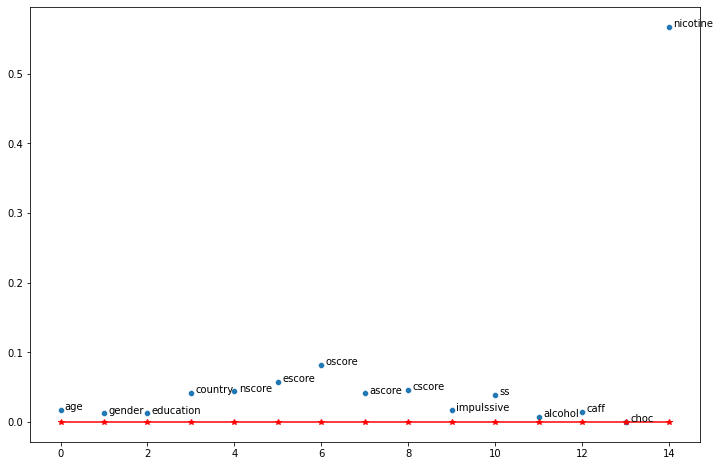

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    if features_importances.values[i] < 0:
      col = 'r'
    else: 
      col = 'black'
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]), color=col)
plt.plot(range(len(features_importances)), [0]*len(features_importances), 'r*-')
plt.savefig('feature-importance-dtc')

Foram elencadas as 5 variáveis mais influentes sobre a árvore de decisão e é possível observar que a droga nicotina (uma droga lícita), apresentou a maior importância considerando o modelo de **Arvore de Decisão**, como é de amplo conhecimento, a nicotina tem alto tero viciante, tornando o usuario dependente e podendo facilitar a abertura de caminhos para outras drogas, tanto lícitas como ilícitas.

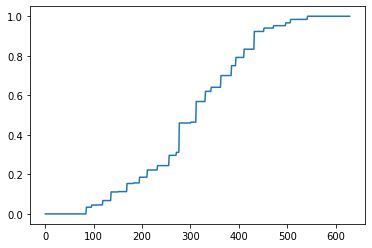

In [ ]:
plt.plot(range(X_test.shape[0]),np.sort(dtc.predict_proba(X_test)[:,1]))
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[261,  37],
       [ 51, 281]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       298
           1       0.88      0.85      0.86       332

    accuracy                           0.86       630
   macro avg       0.86      0.86      0.86       630
weighted avg       0.86      0.86      0.86       630



O modelo tem grande poder preditivo, dada a alta acurácia (87%) e também a alta precisão entre as classes (85% de precisão para não usuários, e 89% de precisão para usuários de drogas ilícitas, sendo melhor para a segunda classe). É possível observar também que o modelo obteve uma taxa mais alta do recall para não usuários de drogas ilícitas, sendo de 88% contra 86% para não usuários.

##### 4.3.2.1 Validação Cruzada

In [ ]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, Y)
for train_index, test_index in tqdm(skf.split(X_resampled, y_resampled)):
    X_air_train, X_air_test = X_resampled.values[train_index], X_resampled.values[test_index]
    y_air_train, y_air_test = y_resampled.values[train_index], y_resampled.values[test_index]
    model = DecisionTreeClassifier(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

5it [00:00, 134.32it/s]

[[232  80]
 [ 95 223]]
[[273  39]
 [ 48 269]]
[[283  29]
 [ 30 287]]
[[254  58]
 [ 28 289]]
[[301  11]
 [ 52 265]]
Acc: 0.8506 | Std: 0.06675
Recall [0]: 0.8609 | Recall [1]: 0.8406
Precision [0]: 0.8435 | Precision [1]: 0.8621
0.05962944030761719


#### 4.3.3 Floresta Aleatória

In [105]:
param_grid_rfc = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [100,200,300,400],
    'min_samples_leaf': [5,50,100,200,300],
    'n_estimators': [100,300,500],
    'random_state': [0]
}

In [106]:
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, param_grid_rfc, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

In [134]:
clf.best_params_

Assim como na **árvore de decisão**, foi feita a seleção dos melhores parametros para a **floresta aleatória**, e o índice de gini é o melhor para medir a impureza nesta situação.

In [135]:
rfc = RandomForestClassifier(**clf.best_params_)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=5,
                       n_estimators=500, random_state=0)

In [136]:
features_importances = pd.DataFrame(rfc.feature_importances_,
                                columns=['importances'],
                                index=X.columns)
# Ranking top 5 variáveis mais influentes sobre a árvore de decisão
features_importances.sort_values('importances', ascending=False).head()


,importances
nicotine,0.342696
ss,0.102260
country,0.097867
oscore,0.093514
cscore,0.067847


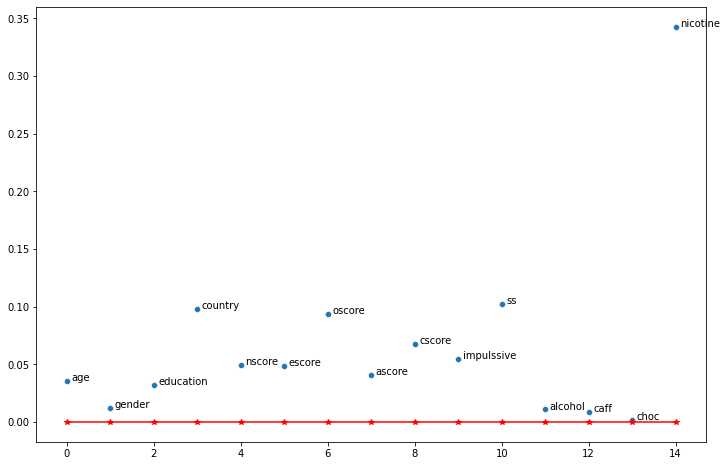

In [137]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    if features_importances.values[i] < 0:
      col = 'r'
    else: 
      col = 'black'
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]))
plt.plot(range(len(features_importances)), [0]*len(features_importances), 'r*-')
plt.savefig('feature-importance-rf')

Nota-se que o comportamento visto para a **Arvore de Decisão** é repetido para o algoritmo da **Floresta Aleatoria**, mais uma vez vendo que a nicotina apresenta uma alta importância para a tarefa de classificação proposta.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[270,  28],
       [ 25, 307]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       298
           1       0.92      0.92      0.92       332

    accuracy                           0.92       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.92      0.92      0.92       630



Comparando as métricas da **árvore de decisão** com as da **floresta aleatória**, é possível observar que a aplicação do segundo consegue melhorar os resultados do primeiro, trazendo uma acurácia e precisão, para ambas as classes, de 90%. Também é visível que temos um aumento no recall, permanecendo a classe dos usuários de drogas ilícitas com maior porcentagem, 91% contra 90% da classe de não usuários.

##### 4.3.3.1 Validação Cruzada

In [ ]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, Y)
for train_index, test_index in tqdm(skf.split(X_resampled, y_resampled)):
    X_air_train, X_air_test = X_resampled.values[train_index], X_resampled.values[test_index]
    y_air_train, y_air_test = y_resampled.values[train_index], y_resampled.values[test_index]
    model = RandomForestClassifier(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
1it [00:00,  3.56it/s]

[[237  75]
 [ 68 250]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
2it [00:00,  3.47it/s]

[[280  32]
 [ 33 284]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
3it [00:00,  3.36it/s]

[[287  25]
 [ 18 299]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
4it [00:01,  3.42it/s]

[[260  52]
 [ 24 293]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
5it [00:01,  3.46it/s]

[[293  19]
 [ 31 286]]
Acc: 0.8802 | Std: 0.05662
Recall [0]: 0.8699 | Recall [1]: 0.8904
Precision [0]: 0.8865 | Precision [1]: 0.8756
1.4710936546325684


#### 4.3.4 Regressão Logística

In [127]:
param_grid_rl = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [128]:
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid_rl, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [129]:
clf.best_params_

{'C': 1}

In [130]:
lr = LogisticRegression(**clf.best_params_)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1)

In [131]:
features_importances = pd.DataFrame(lr.coef_[0]/np.sum(np.abs(lr.coef_[0])),
                                    columns=['importances'],
                                    index=X_train.columns)
# Ranking top 5 variáveis mais influentes sobre a árvore de decisão
features_importances.sort_values('importances', ascending=False).head()

,importances
nicotine,0.455689
alcohol,0.167782
caff,0.111690
gender,0.058954
choc,0.045006


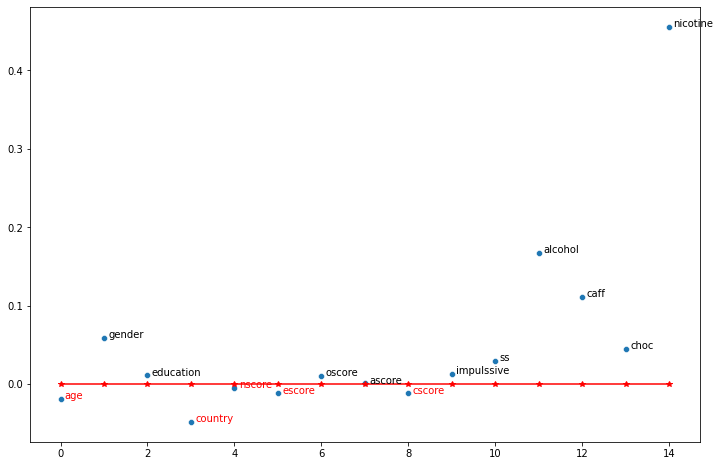

In [132]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    if features_importances.values[i] < 0:
      col = 'r'
    else: 
      col = 'black'
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]), color=col)
plt.plot(range(len(features_importances)), [0]*len(features_importances), 'r*-')
plt.savefig('feature-importance-rl')

Assim como nos modelos anteriores, a nicotina é a variável de maior importância no modelo de **regressão logística**.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[258,  40],
       [ 38, 294]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       298
           1       0.88      0.89      0.88       332

    accuracy                           0.88       630
   macro avg       0.88      0.88      0.88       630
weighted avg       0.88      0.88      0.88       630



##### Verificando variaveis significantes

In [54]:
X.columns

Index(['age', 'gender', 'education', 'country', 'nscore', 'escore', 'oscore',
       'ascore', 'cscore', 'impulssive', 'ss', 'alcohol', 'caff', 'choc',
       'nicotine'],
      dtype='object')

In [62]:
# Formula matematica para colocar no modelo GLM
formula = 'used' + ' ~ ' + ' + '.join(X.columns)

# Conjuntos de treino (X e Y)
data_train = pd.DataFrame(X_train,
                          columns=X.columns)
data_train['used'] = y_train
# Conjuntos de test (X e Y)
data_test = pd.DataFrame(X_test,
                        columns=X.columns)
data_test['used'] = y_test
# Instanciando o modelo
model = sm.GLM.from_formula(formula,
                            family = sm.families.Binomial(),
                            data=data_train)
# Ajustando e obtendo os results
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   used   No. Observations:                 2516
Model:                            GLM   Df Residuals:                     2500
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -803.12
Date:                Wed, 01 Dec 2021   Deviance:                       1606.2
Time:                        18:18:07   Pearson chi2:                 3.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7350      0.922     -5.134      0.000      -6.543      -2.927
age           -0.0836      0.058     -1.449      0.147      -0.197       0.030
gender         0.1453      0.143      1.015      0.310      -0.135       0.426
education      0.0831      0.041      2.050      0.040       0.004       0.162
country       -0.2823      0.039     -7.281      0.000      -0.358      -0.206
nscore        -0.0045      0.009     -0.484      0.628      -0.023       0.014
escore        -0.0561      0.013     -4.177      0.000      -0.082      -0.030
oscore         0.0776      0.012      6.348      0.000       0.054       0.102
ascore         0.0198      0.012      1.612      0.107      -0.004       0.044
cscore        -0.0557      0.013     -4.376      0.000      -0.081      -0.031
impulssive     0.0950      0.048      1.985      0.047       0.001       0.189
ss             0.1966      0.037      5.245      0.000       0.123       0.270
alcohol        1.6882      0.375      4.496      0.000       0.952       2.424
caff           1.7144      0.415      4.131      0.000       0.901       2.528
choc           0.7103      0.432      1.643      0.100      -0.137       1.558
nicotine       3.0490      0.135     22.551      0.000       2.784       3.314
==============================================================================
"""

##### 4.3.4.1 Validação Cruzada

In [ ]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, Y)
for train_index, test_index in tqdm(skf.split(X_resampled, y_resampled)):
    X_air_train, X_air_test = X_resampled.values[train_index], X_resampled.values[test_index]
    y_air_train, y_air_test = y_resampled.values[train_index], y_resampled.values[test_index]
    model = LogisticRegression(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

[[226  86]
 [ 77 241]]
[[276  36]
 [ 45 272]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[[286  26]
 [ 22 295]]
[[253  59]
 [ 26 291]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
5it [00:00, 17.65it/s]

[[280  32]
 [ 37 280]]
Acc: 0.8583 | Std: 0.06198
Recall [0]: 0.8468 | Recall [1]: 0.8696
Precision [0]: 0.8649 | Precision [1]: 0.8536
0.31066012382507324


#### 4.3.5 Agrupamento (*KMeans*)

Foi aplicado uma **Análise de Componentes Principais** (**PCA**) para analisar como os grupos se comportam.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


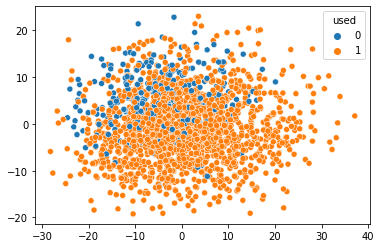

In [93]:
pca = PCA(2)
#x = pca.fit_transform(data.drop([y_name],axis=1))
x = pca.fit_transform(data[X_train.columns])
sns.scatterplot(x[:,0],x[:,1],hue=data[y_name])
plt.show()

É possivel ver que as classes são sobrepostas, dificultando a tarefa de agrupamento e tornando assim inviável de ser utilizada. A seguir será aplicado o método *KMeans* para ilustrar que para esse objetivo (identificar usuários de não usuários de drogas ilícitas) essa tarefa não é a mais recomendada.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [ ]:
K = 1000
rand = []

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, Y)
for train_index, test_index in tqdm(skf.split(X_resampled, y_resampled)):
    X_air_train, X_air_test = X_resampled.values[train_index], X_resampled.values[test_index]
    y_air_train, y_air_test = y_resampled.values[train_index], y_resampled.values[test_index]
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X_air_train)
    y_pred = kmeans.predict(X_air_test)
    rand.append(adjusted_rand_score(y_air_test.T[0], y_pred))

5it [00:00,  7.41it/s]


In [ ]:
np.mean(rand)

0.04440271277184328

## 5. Conclusão

Com base nos resultados descritos acima, podemos observar que a droga de maior importância nos modelos de classificação é a nicotina, uma droga legalizada e de alto teor viciante, que causa problemas de saúde extremamente graves, podendo ser a porta de entrada para outras drogas que são consumidas da mesma forma. O algoritimo de **floresta aleatória** apresentou a melhor performance dentre os modelos de classificação, apresentando altos índices de precisão. 

Um fato intrigante que pôde ser observado é que o agrupamento não é uma boa técnica para esta análise dada a característica de sobreposição dos grupos.

O modelo proposto pode ser utilizado também para predizer a probabilidade de um individuo ter usado qualquer tipo de droga ilicita, podendo ser interessante para empresas que trabalham com testagem anti-dopping.